**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA
from sklearn import preprocessing, model_selection


**MOUNTING TO GOOGLE DRIVE**

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/content/companies.csv")

**TOTAL NO OF ROWS AND COLUMNS IN DATASET**

In [ ]:
data.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


**CHECKING THE NULLVALUES**

In [ ]:
data.info(verbose=True, null_counts=True)

<ipython-input-6-c1a516913eb1>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

**Observation**:total 35 columns having the nullvalues

In [ ]:
# Calculate the sum of null values for each column
null_counts = data.isnull().sum()

# Count the number of columns with null values
columns_with_null = null_counts[null_counts > 0].count()

print("Number of columns with null values:", columns_with_null)


Number of columns with null values: 35


**SUMMARY STATISTICS**

In [ ]:
# Display summary statistics for numerical columns
print(data.describe())


        Unnamed: 0.1      entity_id  parent_id     logo_width    logo_height  \
count  196553.000000  196553.000000        0.0  110110.000000  110110.000000   
mean    98276.000000  153006.227333        NaN     459.132685     222.728917   
std     56740.108067   90209.250941        NaN     594.982577     333.090722   
min         0.000000       1.000000        NaN       1.000000       1.000000   
25%     49138.000000   59850.000000        NaN     192.000000      70.000000   
50%     98276.000000  174539.000000        NaN     267.000000     105.000000   
75%    147414.000000  232655.000000        NaN     484.000000     232.000000   
max    196552.000000  286215.000000        NaN   18200.000000    9600.000000   

       investment_rounds  invested_companies  funding_rounds  \
count        2591.000000         2591.000000    31707.000000   
mean            2.372057            2.204940        1.659760   
std            12.173510           11.436955        1.201666   
min             1.00000

**CHECKING THE MISSING VALUES**

In [ ]:
# Check for missing values
print(data.isnull().sum())


id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

**CALCULATING THE NULL VALUES PERCENTAGE**

In [ ]:
# Calculate the percentage of null values in each column
null_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame to display the results
null_percentage_df = pd.DataFrame({'Column': data.columns, 'Null Percentage': null_percentage})
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage', ascending=False)

# Display the DataFrame
print(null_percentage_df)


                                  Column  Null Percentage
parent_id                      parent_id       100.000000
ROI                                  ROI        99.630634
first_investment_at  first_investment_at        98.685851
last_investment_at    last_investment_at        98.685851
investment_rounds      investment_rounds        98.681780
invested_companies    invested_companies        98.681780
closed_at                      closed_at        98.667026
short_description      short_description        96.371971
funding_total_usd      funding_total_usd        85.818583
last_funding_at          last_funding_at        83.970227
first_funding_at        first_funding_at        83.970227
funding_rounds            funding_rounds        83.868473
state_code                    state_code        74.102151
twitter_username        twitter_username        58.997828
tag_list                        tag_list        58.559778
lat                                  lat        57.338733
lng           

**DROPPING THE UNWANTED COLUMNS**

**'id','Unnamed:0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview', 'short_description','twitter_username','description','tag_list','country_code','state_code','city','first_investment_at','last_investment_at','first_milestone_at', 'last_milestone_at','first_funding_at','last_funding_at','lat','lng'**













**Dropping all these columns because1.Some columns are empty2.Unwanted object columns3.70% of Null values present in the columns4.Empty columns5.Unnecessary columns**



In [ ]:
data = data.drop(columns = ['id','entity_type','permalink','region','created_by','Unnamed: 0.1','normalized_name','parent_id','domain','homepage_url','logo_url','logo_width','logo_height','overview','short_description','twitter_username','short_description','description','tag_list','state_code','city','first_investment_at', 'last_investment_at','first_milestone_at','last_milestone_at',  'first_funding_at','last_funding_at','lat','lng'])
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI
0,1,Wetpaint,web,operating,2005-10-17,NaN,USA,NaN,NaN,3.0,39750000.0,5.0,17.0,2007-05-25 06:51:27,2013-04-13 03:29:00,15.5
1,10,Flektor,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,6.0,2007-05-31 21:11:51,2008-05-23 23:23:14,NaN
2,100,There,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,4.0,12.0,2007-08-06 23:52:45,2013-11-04 02:09:48,NaN
3,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN
4,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN


**AFTER DROPPING UNWANTED COLUMNS HERE IS THE SHAPE OF THE DATASET**

**OBSERVED:28 UNWANTED COLUMNS WAS DELETED**

In [ ]:
data.shape

(196553, 16)

In [ ]:
data.columns

Index(['entity_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'country_code', 'investment_rounds', 'invested_companies',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'created_at', 'updated_at', 'ROI'],
      dtype='object')

**DROPPING SOME NULL VALUES OF SOME SELECTED COLUMNS**
*   **Observation**: The DataFrame data underwent a reduction in size after dropping rows with null values in the specified columns, resulting in an updated shape



In [ ]:
data.dropna(subset= ['name','country_code','category_code','founded_at'],inplace = True)
data.shape

(64094, 16)

**FILLING THE INVESTMENT_ROUNDS NULL VALUES WITH MEDIAN**
* **Observation**: Missing values in the 'investment_rounds' column were replaced with the median value of the column in the DataFrame 'data'.



In [ ]:
data['investment_rounds'] = data['investment_rounds'].fillna(data['investment_rounds'].median())

**COUNTING THE VALUES OF INVESTED_COMPANIES VALUES**
* **Observation**: A count of unique values in the 'invested_companies' column of the DataFrame 'data' was observed, revealing the frequency distribution of the number of invested companies.

In [ ]:
data['invested_companies'].value_counts()

1.0      460
2.0      104
3.0       56
4.0       26
5.0       23
6.0       14
7.0       13
14.0       6
16.0       5
9.0        4
8.0        4
11.0       2
10.0       2
29.0       2
38.0       2
26.0       2
18.0       2
24.0       2
21.0       2
20.0       2
57.0       1
68.0       1
44.0       1
124.0      1
12.0       1
39.0       1
79.0       1
268.0      1
30.0       1
73.0       1
459.0      1
33.0       1
13.0       1
47.0       1
17.0       1
51.0       1
Name: invested_companies, dtype: int64

**FILLING THE INVESTMENT_COMPANIES NULL VALUES WITH MEDIAN**


* **Observation**: Missing values in the 'invested_companies' column were replaced with the median value of the column in the DataFrame 'data'.



In [ ]:
data['invested_companies'] = data['invested_companies'].fillna(data['invested_companies'].median())

**FILLING THE FUNDING_ROUNDS NULL VALUES WITH MEDIAN**


*   **Observation**: Missing values in the '**funding_rounds**' column were replaced with the median value of the column in the DataFrame 'data'.



In [ ]:
data['funding_rounds'] = data['funding_rounds'].fillna(data['funding_rounds'].median())

**FILLING THE FUNDING_ROUNDS NULL VALUES WITH MEAN**


*   **Observation:** Missing values in the '**funding_total_usd**' column were replaced with the median value of the column in the DataFrame 'data'.

In [ ]:
data['funding_total_usd'] = data['funding_total_usd'].fillna(data['funding_total_usd'].mean())

**FILLING THE MILESTONES NULL VALUES WITH MODE**


*   **Observation:** Missing values in the **'milestones'** column were replaced with the mode value of the column in the DataFrame 'data'.



In [ ]:
data['milestones'] = data['milestones'].fillna(data['milestones'].mode()[0])

**COUNTING THE VALUES OF RELATIONSHIPS VALUES**

In [ ]:
data['relationships'].value_counts()

1.0      13943
2.0      10982
3.0       7221
4.0       4384
5.0       2723
         ...  
183.0        1
155.0        1
122.0        1
387.0        1
67.0         1
Name: relationships, Length: 137, dtype: int64

**FILLING THE RELATIONSHIPS NULL VALUES WITH MEAN**


*   **Observation**: Missing values in the **'relationships'** column were replaced with the mean value of the column in the DataFrame 'data'.



In [ ]:
data['relationships'] = data['relationships'].fillna(data['relationships'].mean())

**FILLING THE ROI NULL VALUES WITH MEAN**


*  **Observation:** Missing values in the **'ROI'** column were replaced with the mean value of the column in the DataFrame 'data'.



In [ ]:
data['ROI'] = data['ROI'].fillna(data['ROI'].mean())

**CONVERTING THE FOUNDED_AT COLUMN INTO DATETIME FORMAT**

In [ ]:
data['founded_at'] = pd.to_datetime(data['founded_at'])
data['founded_at'] = data['founded_at'].dt.year

**FILLING THE FOUNDED_AT NULL VALUES WITH MODE**

In [ ]:
data['founded_at'] = data['founded_at'].fillna(data['founded_at'].mode()[0])

**CONVERTING THE CLOSED_AT COLUMN INTO DATETIME FORMAT**

In [ ]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['closed_at'] = data['closed_at'].dt.year

**FILLING THE CLOSED_AT NULL VALUES WITH MODE**

In [ ]:
data['closed_at'].mode()[0]

2012.0

**THE CODE WILL FILL THE MISSING VALUES IN CLOSED_AT IN 2021 FOR OPERATING OR IPO AND WITH 2012 WITH ACQYIRED AND CLOSED**
***Observation**: The code attempts to fill missing values in the 'closed_at' column based on entity status, but logical errors in the conditions may lead to incorrect handling of missing values.



In [ ]:
for i in data['status']:
    if (i == 'operating' or 'ipo'):
        data['closed_at'].fillna(2021,inplace = True)
    elif (i == 'accquired' or 'closed'):
        data['closed_at'].fillna(2012, inplace = True)

**UPDATEING THE DATECOLUMN AND TAKING ONLY THE YEAR FROM CREATED_AT COLUMN**


* **Observation**: The code extracts the year from the 'created_at' dates in the DataFrame 'data' by splitting the string at the hyphen '-' and appending only the year portion to a new list named 'created'. Finally, the 'created_at' column is updated with the extracted years.


In [ ]:
created = []
for i in data['created_at']:
    created.append(i.split('-')[0])
data['created_at']= created

**UPDATEING THE DATECOLUMN AND TAKING ONLY THE YEAR FROM UPDATED_AT COLUMN**


1.Observation: The code iterates through the 'updated_at' column in the

*   List item
*   List item

DataFrame 'data', splits each date string by the hyphen '-', extracts the year portion, converts it into an integer, and appends it to a list named 'created'. Finally, the 'updated_at' column is updated with the extracted years as integers.



In [ ]:
created = []
for i in data['updated_at']:
    created.append(int(i.split('-')[0]))
data['updated_at']= created

**ADDING NEW UPDATED COLUMNS**

**ADDING COMPANY AGE IN YEARS BY SUBTRATING THE FOUNDED AT FROM CLOSED AT**
* **Observation**:columns named 'closed_at' and 'founded_at' necessary to calculate company ages.



In [ ]:
data['companies_age'] = data['closed_at'] - data['founded_at']
data['companies_age']

0         16.0
5         14.0
6         13.0
12        13.0
13        14.0
          ... 
196548    14.0
196549    14.0
196550    62.0
196551    13.0
196552    14.0
Name: companies_age, Length: 64094, dtype: float64

**AFTER SUBTRACTING WE HAVE SOME NEGATIVE VALUES SO PLEASE REMOVE SOME NEGATIVE VALUES**
* **Observation**:Removing negative values from the 'companies_age' column ensures data accuracy and reliability for subsequent analysis.



In [ ]:
index = np.where(data['companies_age'] < 0)
data['companies_age'] = data['companies_age'].drop(data['companies_age'].index[index])

**FILLING THE NULLVALUES OF COMPANY AGE WITH 0**
* **Observation:**Assigning zero to missing values in the 'companies_age' column helps maintain consistency in the dataset and ensures uniformity for subsequent analyses.



In [ ]:
data['companies_age'] = data['companies_age'].fillna(0)

In [ ]:
data.head()

,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,Wetpaint,web,operating,2005,2021.0,USA,1.0,1.0,3.0,3.975000e+07,5.0,17.00000,2007,2013,15.50000,16.0
5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,14.0
6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,14.41045,13.0
12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,14.41045,13.0
13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,9.50000,14.0


**CHECKING THE NULLVALUES IN THE DATASET**

In [ ]:
data.isna().sum()

entity_id             0
name                  0
category_code         0
status                0
founded_at            0
closed_at             0
country_code          0
investment_rounds     0
invested_companies    0
funding_rounds        0
funding_total_usd     0
milestones            0
relationships         0
created_at            0
updated_at            0
ROI                   0
companies_age         0
dtype: int64

**RESET THE INDEX**

In [ ]:
data.reset_index(inplace = True)

**SHAPE OF THE DATASET**

In [ ]:
data.shape

(64094, 18)

# EDA

**UNIVARIATE PLOTS**

Univariate plots are graphical representations that display the distribution of a single variable in a dataset. They are useful for exploring the characteristics and patterns of individual variables without considering their relationships with other variables


**DISTRIBUTION OF INVESTMENT ROUNDS[HISTOGRAM]**



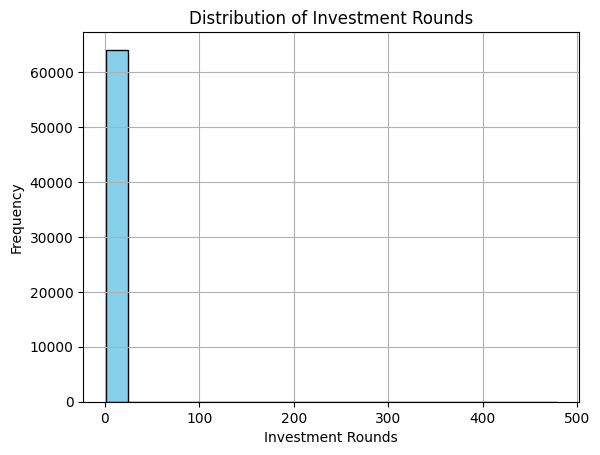

In [ ]:
import matplotlib.pyplot as plt
data['investment_rounds'].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Investment Rounds')
plt.ylabel('Frequency')
plt.title('Distribution of Investment Rounds')
plt.show()


<ipython-input-43-95160525283c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=data, palette='viridis')


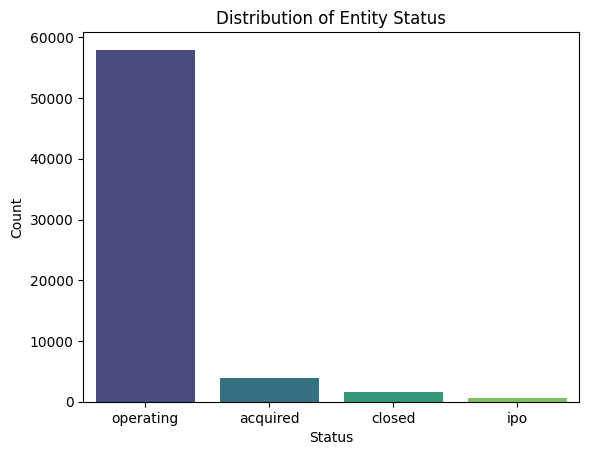

In [ ]:
import seaborn as sns

sns.countplot(x='status', data=data, palette='viridis')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Entity Status')
plt.show()


**FUNDING TOTAL OVER TIME[LINE PLOT]**

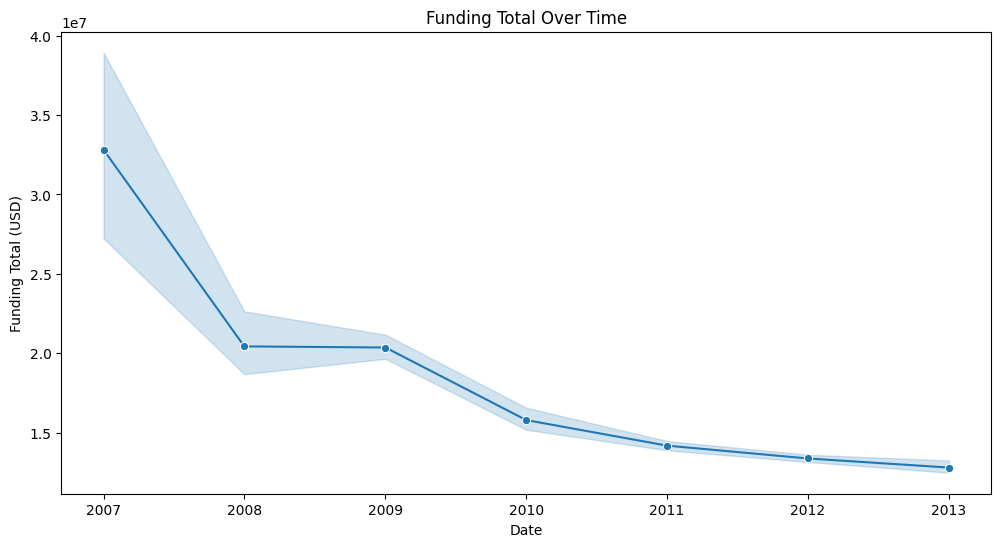

In [ ]:
import seaborn as sns

data['created_at'] = pd.to_datetime(data['created_at'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='created_at', y='funding_total_usd', data=data, marker='o')
plt.xlabel('Date')
plt.ylabel('Funding Total (USD)')
plt.title('Funding Total Over Time')
plt.show()


**CATEGORY CODE [HISTOGRAM]**

<Axes: xlabel='category_code', ylabel='Count'>

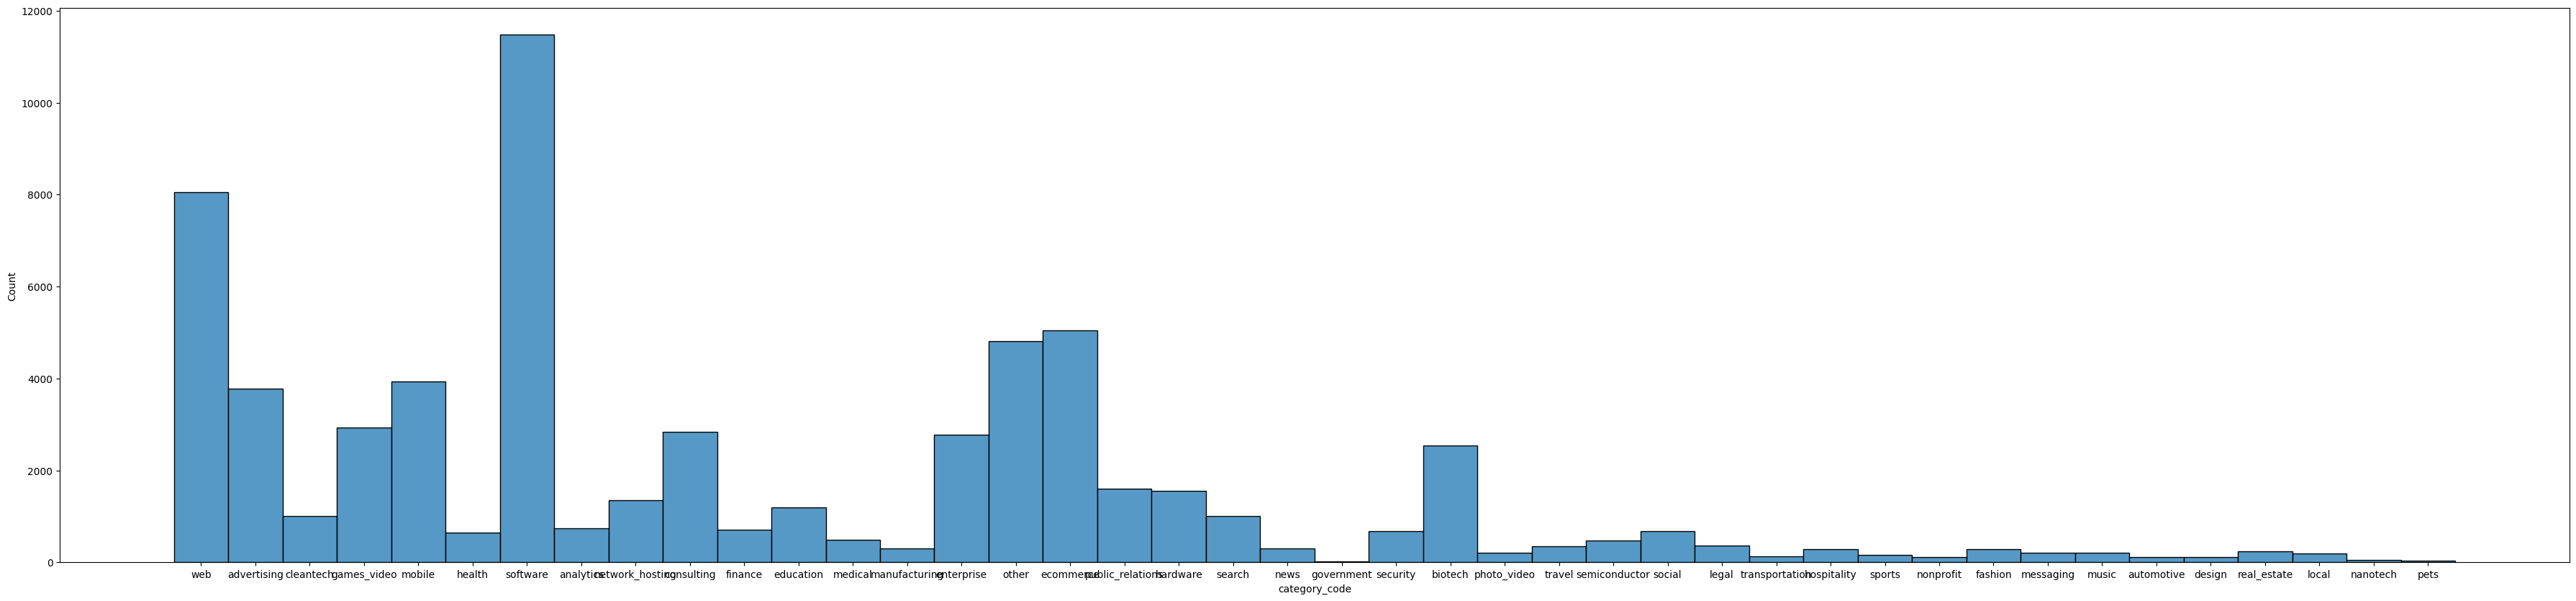

In [ ]:
plt.figure(figsize= (45,10))
sns.histplot(data.category_code)

**BIVARIATE PLOTS**

**CREATED_AT VS UPDATED_AT DENSITY PLOT**

<ipython-input-47-8cf9a8f51993>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-47-8cf9a8f51993>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])


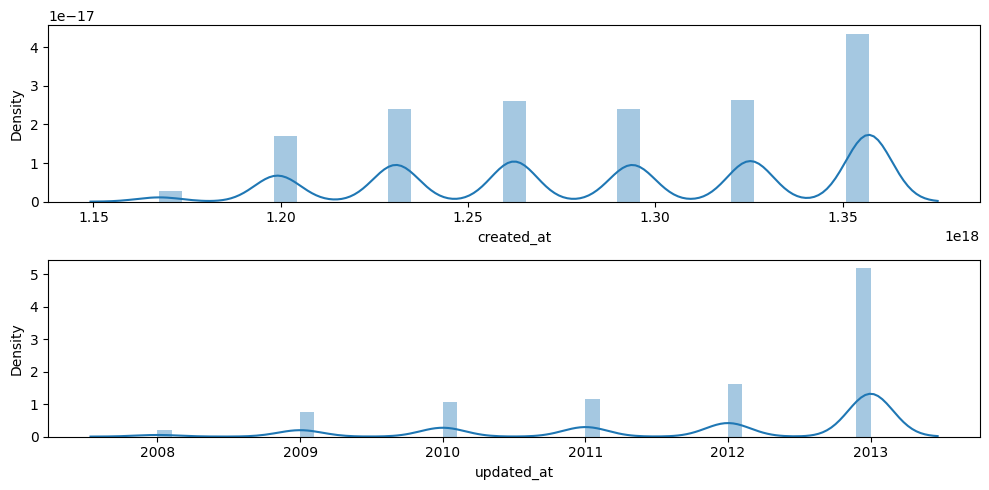

In [ ]:
plt.figure(figsize=(10,5))
plotnumber = 1

for column in data[['created_at','updated_at']]:
    if plotnumber <= 2:
        ax = plt.subplot(2,1,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 10)

    plotnumber+=1
plt.tight_layout()

**MULTIVARIATE PLOTS**

**CORRELATION OF DATASET**

In [ ]:
df_corr = data.corr().abs()

<ipython-input-51-a21546e3f5df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = data.corr().abs()


**NORMAL DISTRIBUTION**

<ipython-input-53-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


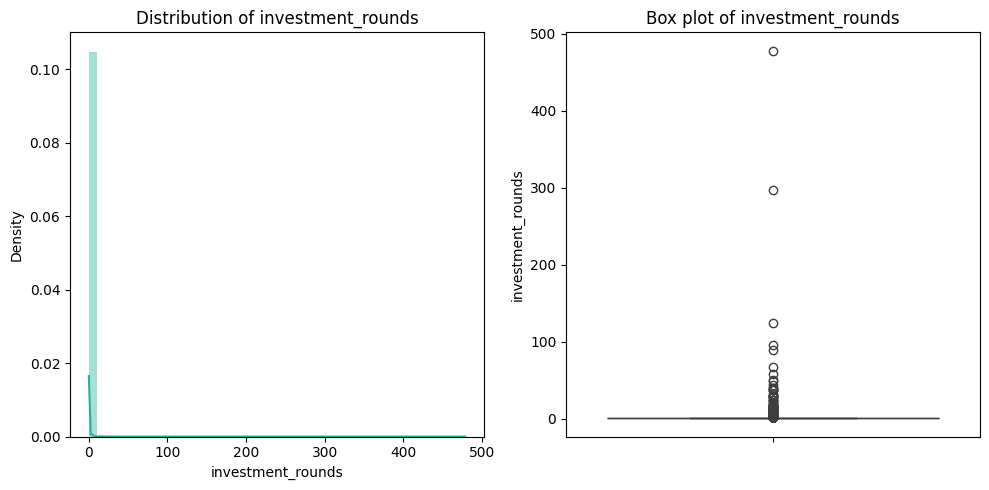

<ipython-input-53-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


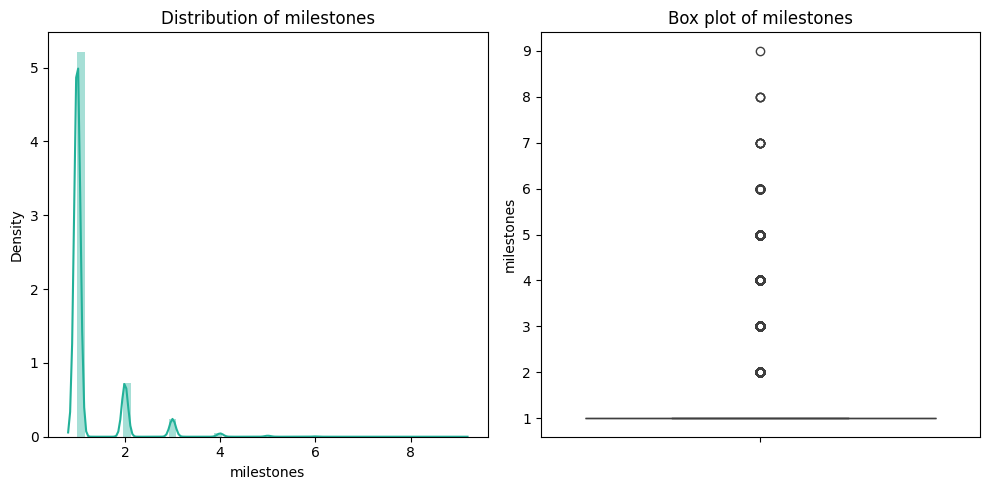

<ipython-input-53-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


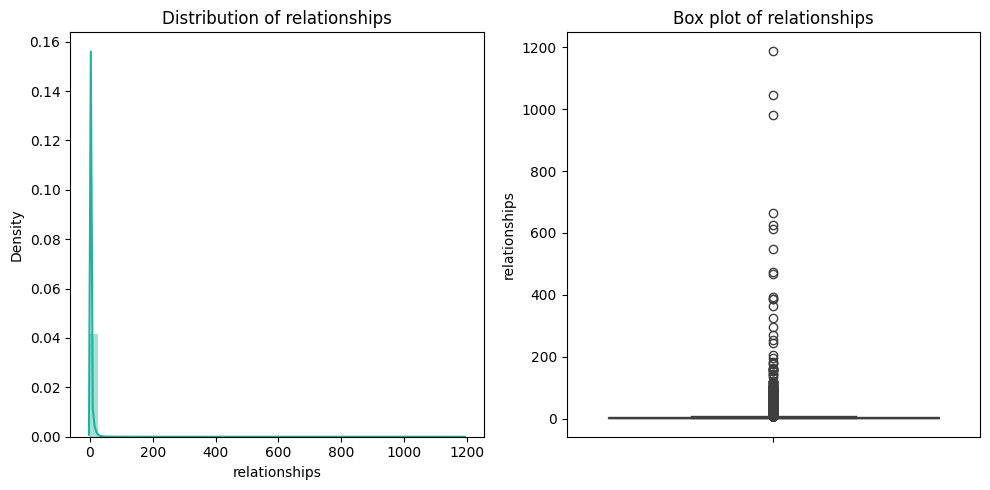

<ipython-input-53-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


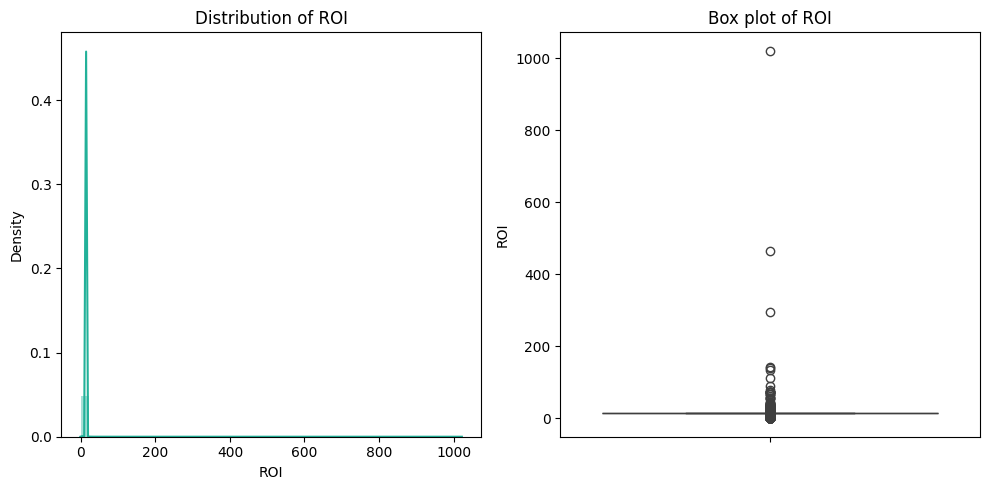

<ipython-input-53-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


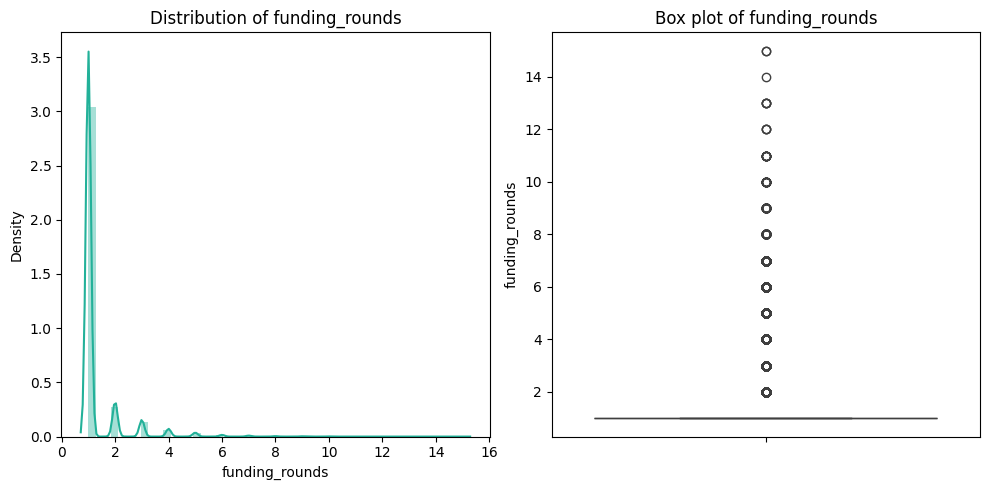

<ipython-input-53-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


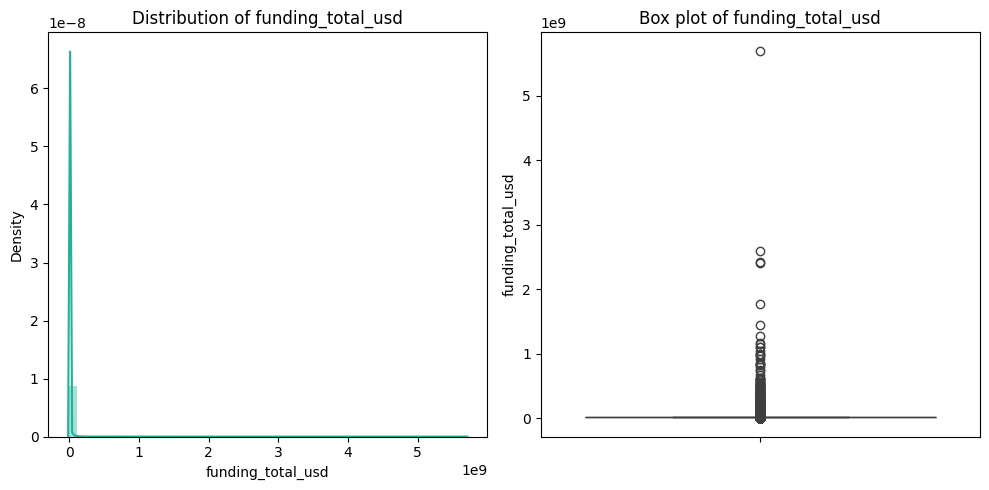

<ipython-input-53-759df16de128>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],color='#22b199',ax=axes[0])


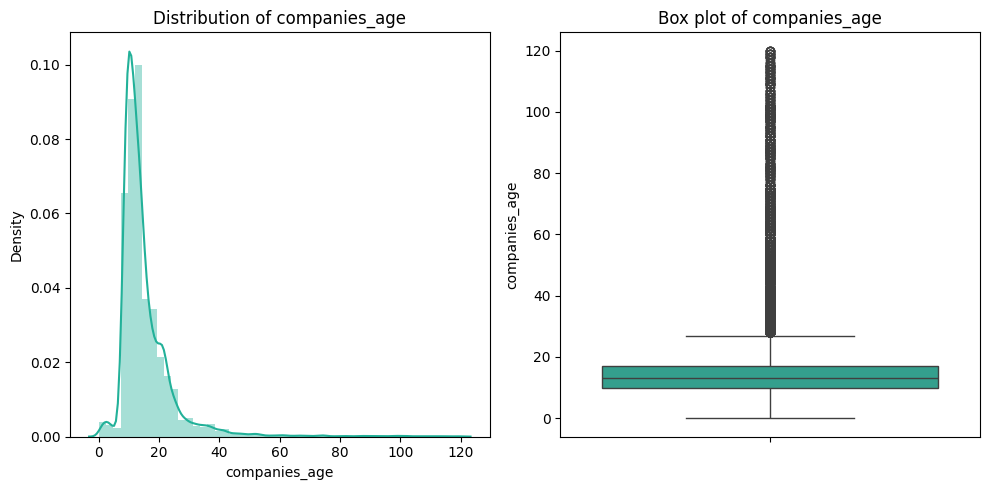

(64094, 18)


In [ ]:
def check_outliers(x):
    global data
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(data[x],color='#22b199',ax=axes[0])
    sns.boxplot(y=data[x],color='#22b199',ax=axes[1])
    axes[0].set_title('Distribution of ' + x)
    axes[1].set_title('Box plot of '+ x)
    plt.tight_layout()
    plt.show()

for i in ['investment_rounds','milestones', 'relationships', 'ROI', 'funding_rounds' ,'funding_total_usd','companies_age']:
    check_outliers(i)

print(data.shape)

**BEFORE REMOVING THE OUTLIERS**

In [ ]:
data[['funding_total_usd','funding_rounds']].describe()

,funding_total_usd,funding_rounds
count,6.409400e+04,64094.000000
mean,1.581978e+07,1.287749
std,3.950322e+07,0.873294
min,2.910000e+02,1.000000
25%,1.500000e+07,1.000000
50%,1.581978e+07,1.000000
75%,1.581978e+07,1.000000
max,5.700000e+09,15.000000


**CALCULATING THE QUARTILES**
*   **Observation:** The code calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for each numerical column in the DataFrame 'data'.



In [ ]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

<ipython-input-55-51b523eeaa4f>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = data.quantile(0.25)
<ipython-input-55-51b523eeaa4f>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = data.quantile(0.75)


**REMOVING OUTLIERS USING IQR METHODS**


* **Observation:** The calculated upper bound for identifying outliers in the 'funding_total_usd' column using the interquartile range (IQR) method is approximately 17,049,455.47.



In [ ]:
high = (q3.funding_total_usd + (1.5 * iqr.funding_total_usd))
print(high)

index = np.where(data['funding_total_usd'] > high)
print(index)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

17049455.46631492
(array([    0,     7,    10, ..., 64031, 64065, 64078]),)
(60069, 18)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,14.0
1,2,6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008-01-01,2010,14.41045,13.0
2,3,12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,13.0
3,4,13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007-01-01,2013,9.50000,14.0
4,5,15,10011,PoetryVisualized.com,games_video,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008-01-01,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,Webgility,ecommerce,operating,2007,2021.0,USA,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011-01-01,2013,14.41045,14.0
60065,64090,196549,9995,FohBoh,public_relations,operating,2007,2021.0,USA,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008-01-01,2013,14.41045,14.0
60066,64091,196550,9996,CSC,consulting,operating,1959,2021.0,USA,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008-01-01,2013,14.41045,62.0
60067,64092,196551,9997,Top-candidate,search,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008-01-01,2013,14.41045,13.0


**REMOVING OUTLIERS USING IQR METHODS**
* **Observation**: The calculated upper bound for identifying outliers in the 'funding_rounds' column using the interquartile range (IQR) method is 1.0. However, no outliers were found in the 'funding_rounds' column based on this criterion.



In [ ]:
high_fu = (q3.funding_rounds + (1.5 * iqr.funding_rounds))
print(high_fu)

index_fu = np.where(data['funding_rounds'] > high)
print(index_fu)

data = data.drop(data.index[index_fu])
print(data.shape)

data.reset_index()

1.0
(array([], dtype=int64),)
(60069, 18)


,level_0,index,entity_id,name,category_code,status,founded_at,closed_at,country_code,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age
0,1,5,10002,Synergie Media,advertising,operating,2007,2021.0,MAR,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,14.0
1,2,6,10003,Green Basti Ecosystems,cleantech,operating,2008,2021.0,IND,1.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008-01-01,2010,14.41045,13.0
2,3,12,10009,dimension5 labs,advertising,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,13.0
3,4,13,1001,FriendFeed,web,acquired,2007,2021.0,USA,1.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007-01-01,2013,9.50000,14.0
4,5,15,10011,PoetryVisualized.com,games_video,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008-01-01,2009,14.41045,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60064,64089,196548,99940,Webgility,ecommerce,operating,2007,2021.0,USA,1.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011-01-01,2013,14.41045,14.0
60065,64090,196549,9995,FohBoh,public_relations,operating,2007,2021.0,USA,1.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008-01-01,2013,14.41045,14.0
60066,64091,196550,9996,CSC,consulting,operating,1959,2021.0,USA,1.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008-01-01,2013,14.41045,62.0
60067,64092,196551,9997,Top-candidate,search,operating,2008,2021.0,USA,1.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008-01-01,2013,14.41045,13.0


**AFTER REMOVING OUTLIERS**
We are not removing every outliers of our dataset because :
1.   Removing all outliers will lead to data leakage.
2.   2695 rows × 29 columns, is the shape of our dataset, after removing theoutliers.
*   Its also not giving the best accuracy for the model.
*  For RandomForest Model the accuracy is approx. 75%
*   For KNN Model the accuracy is approx. 70%









In [ ]:
data.head(20)

,index,entity_id,status,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age,category_code_advertising,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_enterprise,category_code_games_video,category_code_mobile,category_code_other,category_code_software,category_code_web,country_code_AUS,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
1,5,10002,1,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,10003,1,1.0,1.0,1.581978e+07,1.0,4.43465,2008-01-01,2010,14.41045,13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,12,10009,1,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13,1001,0,1.0,1.0,5.000000e+06,3.0,14.00000,2007-01-01,2013,9.50000,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,15,10011,1,1.0,1.0,1.581978e+07,1.0,3.00000,2008-01-01,2009,14.41045,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,18,10014,0,1.0,1.0,1.581978e+07,4.0,9.00000,2008-01-01,2012,14.41045,13.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,20,100155,1,1.0,3.0,1.012529e+07,1.0,6.00000,2011-01-01,2013,14.41045,18.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9,22,100174,1,1.0,1.0,1.581978e+07,1.0,2.00000,2011-01-01,2012,14.41045,10.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
11,25,100180,1,1.0,1.0,1.581978e+07,1.0,4.43465,2011-01-01,2012,14.41045,10.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
12,26,100189,1,1.0,1.0,2.500000e+05,1.0,2.00000,2011-01-01,2013,14.41045,18.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.head()

,index,entity_id,status,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age,category_code_advertising,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_enterprise,category_code_games_video,category_code_mobile,category_code_other,category_code_software,category_code_web,country_code_AUS,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
1,5,10002,1,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,10003,1,1.0,1.0,1.581978e+07,1.0,4.43465,2008-01-01,2010,14.41045,13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,12,10009,1,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13,1001,0,1.0,1.0,5.000000e+06,3.0,14.00000,2007-01-01,2013,9.50000,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,15,10011,1,1.0,1.0,1.581978e+07,1.0,3.00000,2008-01-01,2009,14.41045,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**COUNTING THE VALUES OF CATEGORY CODE VALUES**
*  **Observation:** The code provides a count of unique values in the 'category_code' column of the DataFrame 'data', displaying the frequency distribution of different categories after the consolidation process.



In [ ]:
data['category_code'].value_counts()

other          19106
software       10948
web             7878
ecommerce       4885
mobile          3716
advertising     3583
consulting      2804
games_video     2789
enterprise      2449
biotech         1911
Name: category_code, dtype: int64

**ENCODING THE COUNTRY CODE COLUMN**
*  **Observation:** The list named 'top' contains the top 10 countries by frequency of occurrence in the DataFrame, with 'USA' being the most frequent followed by 'GBR', 'IND', 'CAN', 'DEU', 'FRA', 'AUS', 'ESP', 'ISR', and 'NLD'.



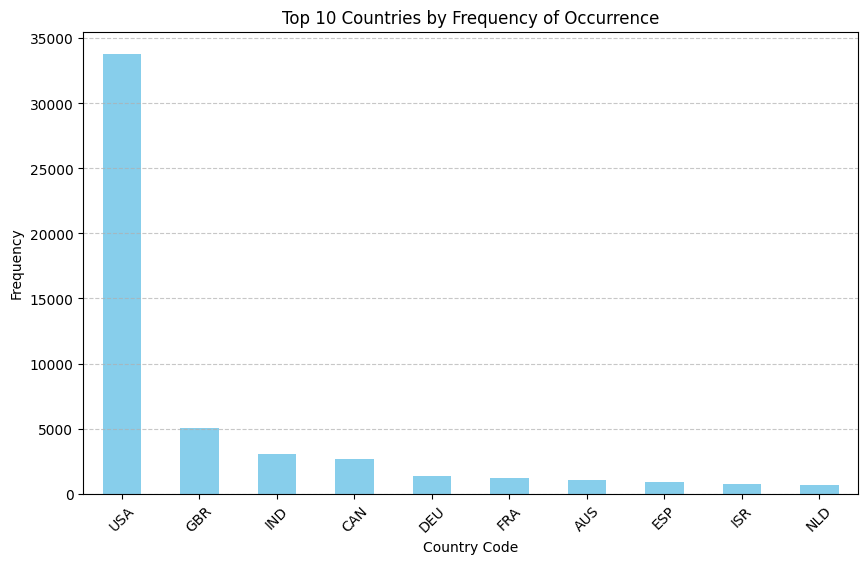

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each country code
country_counts = data['country_code'].value_counts()

# Plotting the top 10 countries
plt.figure(figsize=(10, 6))
country_counts[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Frequency of Occurrence')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
top = ['USA','GBR','IND','CAN','DEU','FRA','AUS','ESP','ISR','NLD']

**UPDATING THE VALUES IN COUNTRY CODE**


*   **Observation:** The code assigns the label 'other' to the 'country_code' column in the DataFrame 'data' for rows where the country code is not present in the list 'top'. This operation likely aims to group less frequent countries into a single category for simplification



In [ ]:
data.loc[~data['country_code'].isin(top),'country_code'] = 'other'

**COUNTING THE VALUES OF COUNTRY CODE VALUES**

In [ ]:
data['country_code'].value_counts()

USA    33820
GBR     5047
IND     3014
CAN     2625
DEU     1364
       ...  
MDG        1
NAM        1
TTO        1
VCT        1
SDN        1
Name: country_code, Length: 165, dtype: int64

In [ ]:
data = pd.get_dummies(data, columns = ['category_code','country_code'])

**DROPPING THE COLUMNS OF NAME AND INVESTED_COMPANIES**

In [ ]:
data.drop(columns = ['name','invested_companies'],inplace = True)

**SHAPE AFTER ENCODING THE DATASET**

In [ ]:
data.shape

(60069, 35)

In [ ]:
data

,index,entity_id,status,founded_at,closed_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
1,5,10002,operating,2007,2021.0,1.0,1.0,1.581978e+07,1.0,2.00000,...,0,0,0,0,0,0,0,0,0,1
2,6,10003,operating,2008,2021.0,1.0,1.0,1.581978e+07,1.0,4.43465,...,0,0,0,0,0,1,0,0,0,0
3,12,10009,operating,2008,2021.0,1.0,1.0,1.581978e+07,1.0,2.00000,...,0,0,0,0,0,0,0,0,1,0
4,13,1001,acquired,2007,2021.0,1.0,1.0,5.000000e+06,3.0,14.00000,...,0,0,0,0,0,0,0,0,1,0
5,15,10011,operating,2008,2021.0,1.0,1.0,1.581978e+07,1.0,3.00000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64089,196548,99940,operating,2007,2021.0,1.0,1.0,1.581978e+07,2.0,5.00000,...,0,0,0,0,0,0,0,0,1,0
64090,196549,9995,operating,2007,2021.0,1.0,1.0,7.500000e+05,1.0,14.00000,...,0,0,0,0,0,0,0,0,1,0
64091,196550,9996,operating,1959,2021.0,1.0,1.0,1.581978e+07,3.0,44.00000,...,0,0,0,0,0,0,0,0,1,0
64092,196551,9997,operating,2008,2021.0,1.0,1.0,1.581978e+07,1.0,1.00000,...,0,0,0,0,0,0,0,0,1,0


**IMBALANDED TARGET COLUMN**


* **Observation**:target column was imbalanced

**COUNTING THE VALUES OF STATE**


* **Observation:** The count of different statuses in the 'status' column of the DataFrame 'data' reveals that the majority of entities are in the 'operating' status, followed by 'acquired', 'closed', and 'ipo' statuses.



In [ ]:
data.status.value_counts()

operating    54823
acquired      3337
closed        1492
ipo            417
Name: status, dtype: int64

**REPLACEING THE STATUS COLUMN VALUES WITH NUMERICAL VALUES**


*   **Observation:** The code converts the categorical values in the 'status' column of the DataFrame 'data' into numerical values, with 'operating' and 'ipo' replaced by 1, indicating active status, while 'closed' and 'acquired' are replaced by 0, indicating inactive status.



In [ ]:
data['status'] = data['status'].replace('operating',1)
data['status'] = data['status'].replace('ipo',1)
data['status'] = data['status'].replace('closed',0)
data['status'] = data['status'].replace('acquired',0)

In [ ]:
x = data.drop('status',axis = 1)
y = data.status

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

**DROP ORIGINAL DATETIME COLUMNS**

In [ ]:
# Drop the original datetime columns
data = data.drop(['founded_at', 'closed_at'], axis=1)


**CONVERT  FOUNDED_AT COLUMN INTO DATETIME FORMAT**

In [ ]:
# Convert 'founded_at' column to datetime format
x_train['founded_at'] = pd.to_datetime(x_train['founded_at'])


**DATATYPES OF XTRAIN**

In [ ]:
print(x_train.dtypes)


index                                 int64
entity_id                             int64
founded_at                   datetime64[ns]
closed_at                           float64
investment_rounds                   float64
funding_rounds                      float64
funding_total_usd                   float64
milestones                          float64
relationships                       float64
created_at                   datetime64[ns]
updated_at                            int64
ROI                                 float64
companies_age                       float64
category_code_advertising             uint8
category_code_biotech                 uint8
category_code_consulting              uint8
category_code_ecommerce               uint8
category_code_enterprise              uint8
category_code_games_video             uint8
category_code_mobile                  uint8
category_code_other                   uint8
category_code_software                uint8
category_code_web               

**NEARMISS**
*  NearMiss is an undersampling technique used to address class imbalance by selectively removing majority class instances close to minority class instances. It aims to improve classifier performance by reducing the imbalance ratio in the training data.
*   **Observation:** The code defines a list named 'datetime_columns' containing the names of datetime columns to be dropped from the training feature variables





In [ ]:
# Define the list of datetime columns to drop
datetime_columns = ['founded_at', 'created_at']

# Drop datetime columns
x_train = x_train.drop(datetime_columns, axis=1)

# Now try using NearMiss again
ds = NearMiss()
x_train_nm, y_train_nm = ds.fit_resample(x_train, y_train)


**BEFORE FIT AND AFTER FIT**

*  **Observation:** Before applying the NearMiss algorithm, the training data is imbalanced, with 41,459 instances belonging to class 1 and 3,592 instances belonging to class 0. After applying NearMiss, the training data is balanced, with 3,592 instances for each class, demonstrating successful undersampling of the majority class to achieve class balance.



In [ ]:
from collections import Counter

# Your code here

print('Before Fit: {}'.format(Counter(y_train)))
print('After Fit: {}'.format(Counter(y_train_nm)))


Before Fit: Counter({1: 41459, 0: 3592})
After Fit: Counter({0: 3592, 1: 3592})


**Observation**: The code assigns the original target variable 'y' back to the variable 'y_train_nm'. This operation effectively reverses any changes made to 'y_train_nm' previously and restores it to its original state.

In [ ]:
data.head()

,index,entity_id,status,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,ROI,companies_age,category_code_advertising,category_code_biotech,category_code_consulting,category_code_ecommerce,category_code_enterprise,category_code_games_video,category_code_mobile,category_code_other,category_code_software,category_code_web,country_code_AUS,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
1,5,10002,1,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6,10003,1,1.0,1.0,1.581978e+07,1.0,4.43465,2008-01-01,2010,14.41045,13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,12,10009,1,1.0,1.0,1.581978e+07,1.0,2.00000,2008-01-01,2008,14.41045,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,13,1001,0,1.0,1.0,5.000000e+06,3.0,14.00000,2007-01-01,2013,9.50000,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5,15,10011,1,1.0,1.0,1.581978e+07,1.0,3.00000,2008-01-01,2009,14.41045,13.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
numeric_df = data.select_dtypes(include='number').dropna()


In [ ]:
target_variable = 'status'
X = numeric_df.drop(columns=[target_variable])
y = numeric_df[target_variable]


In [ ]:
mutual_info_values = mutual_info_regression(X, y_train_nm)



In [ ]:
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mutual_info_values})


In [ ]:
print(mutual_info_df)


                      Feature  Mutual_Information
0                       index            0.020352
1                   entity_id            0.042292
2           investment_rounds            0.000000
3              funding_rounds            0.009794
4           funding_total_usd            0.010303
5                  milestones            0.006989
6               relationships            0.008569
7                  updated_at            0.006361
8                         ROI            0.009896
9               companies_age            0.080295
10  category_code_advertising            0.001855
11      category_code_biotech            0.006745
12   category_code_consulting            0.001715
13    category_code_ecommerce            0.002503
14   category_code_enterprise            0.004549
15  category_code_games_video            0.000000
16       category_code_mobile            0.001710
17        category_code_other            0.000000
18     category_code_software            0.000000


**PCA**






In [ ]:
X = x_train_nm.copy()
pca = PCA(n_components=2)
pca_X= pca.fit_transform(X)

In [ ]:
loadings = pd.DataFrame(
   data = pca_X, columns = ['principal component 1', 'principal component 2']
)
loadings['y']=y_train_nm
loadings

,principal component 1,principal component 2,y
0,1.270420e+07,104689.414053,NaN
1,1.280420e+07,104675.442419,1.0
2,-2.665598e+06,95943.600518,1.0
3,2.114040e+06,-70325.846889,1.0
4,-2.665701e+06,-21602.236637,0.0
...,...,...,...
7179,-2.665577e+06,120724.163551,1.0
7180,-2.665579e+06,117776.884870,1.0
7181,-2.665568e+06,129974.515165,1.0
7182,-2.665718e+06,-40884.796729,1.0


In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.99792582e-01, 1.28630126e-04])

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

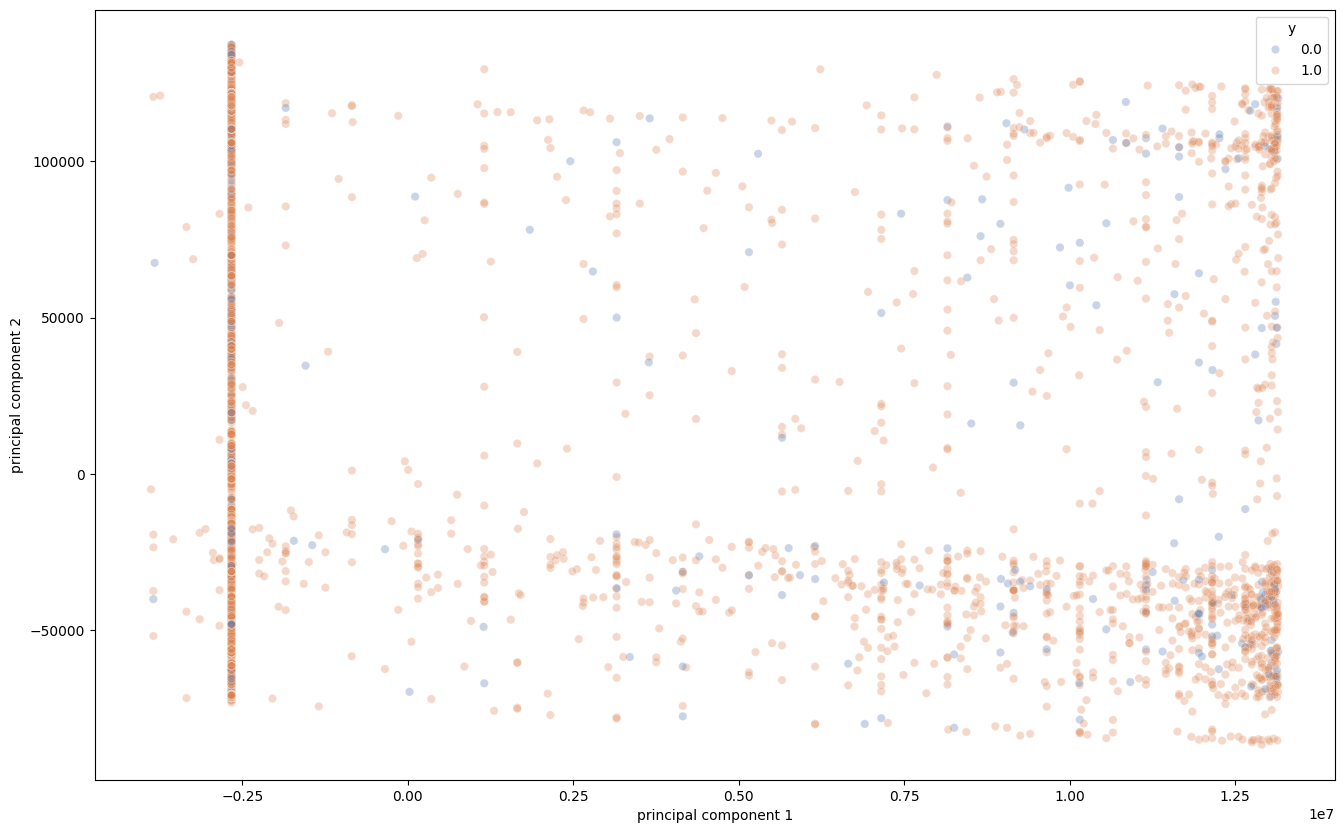

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    data=loadings,
    legend="full",
    alpha=0.3,
    palette="deep"
)

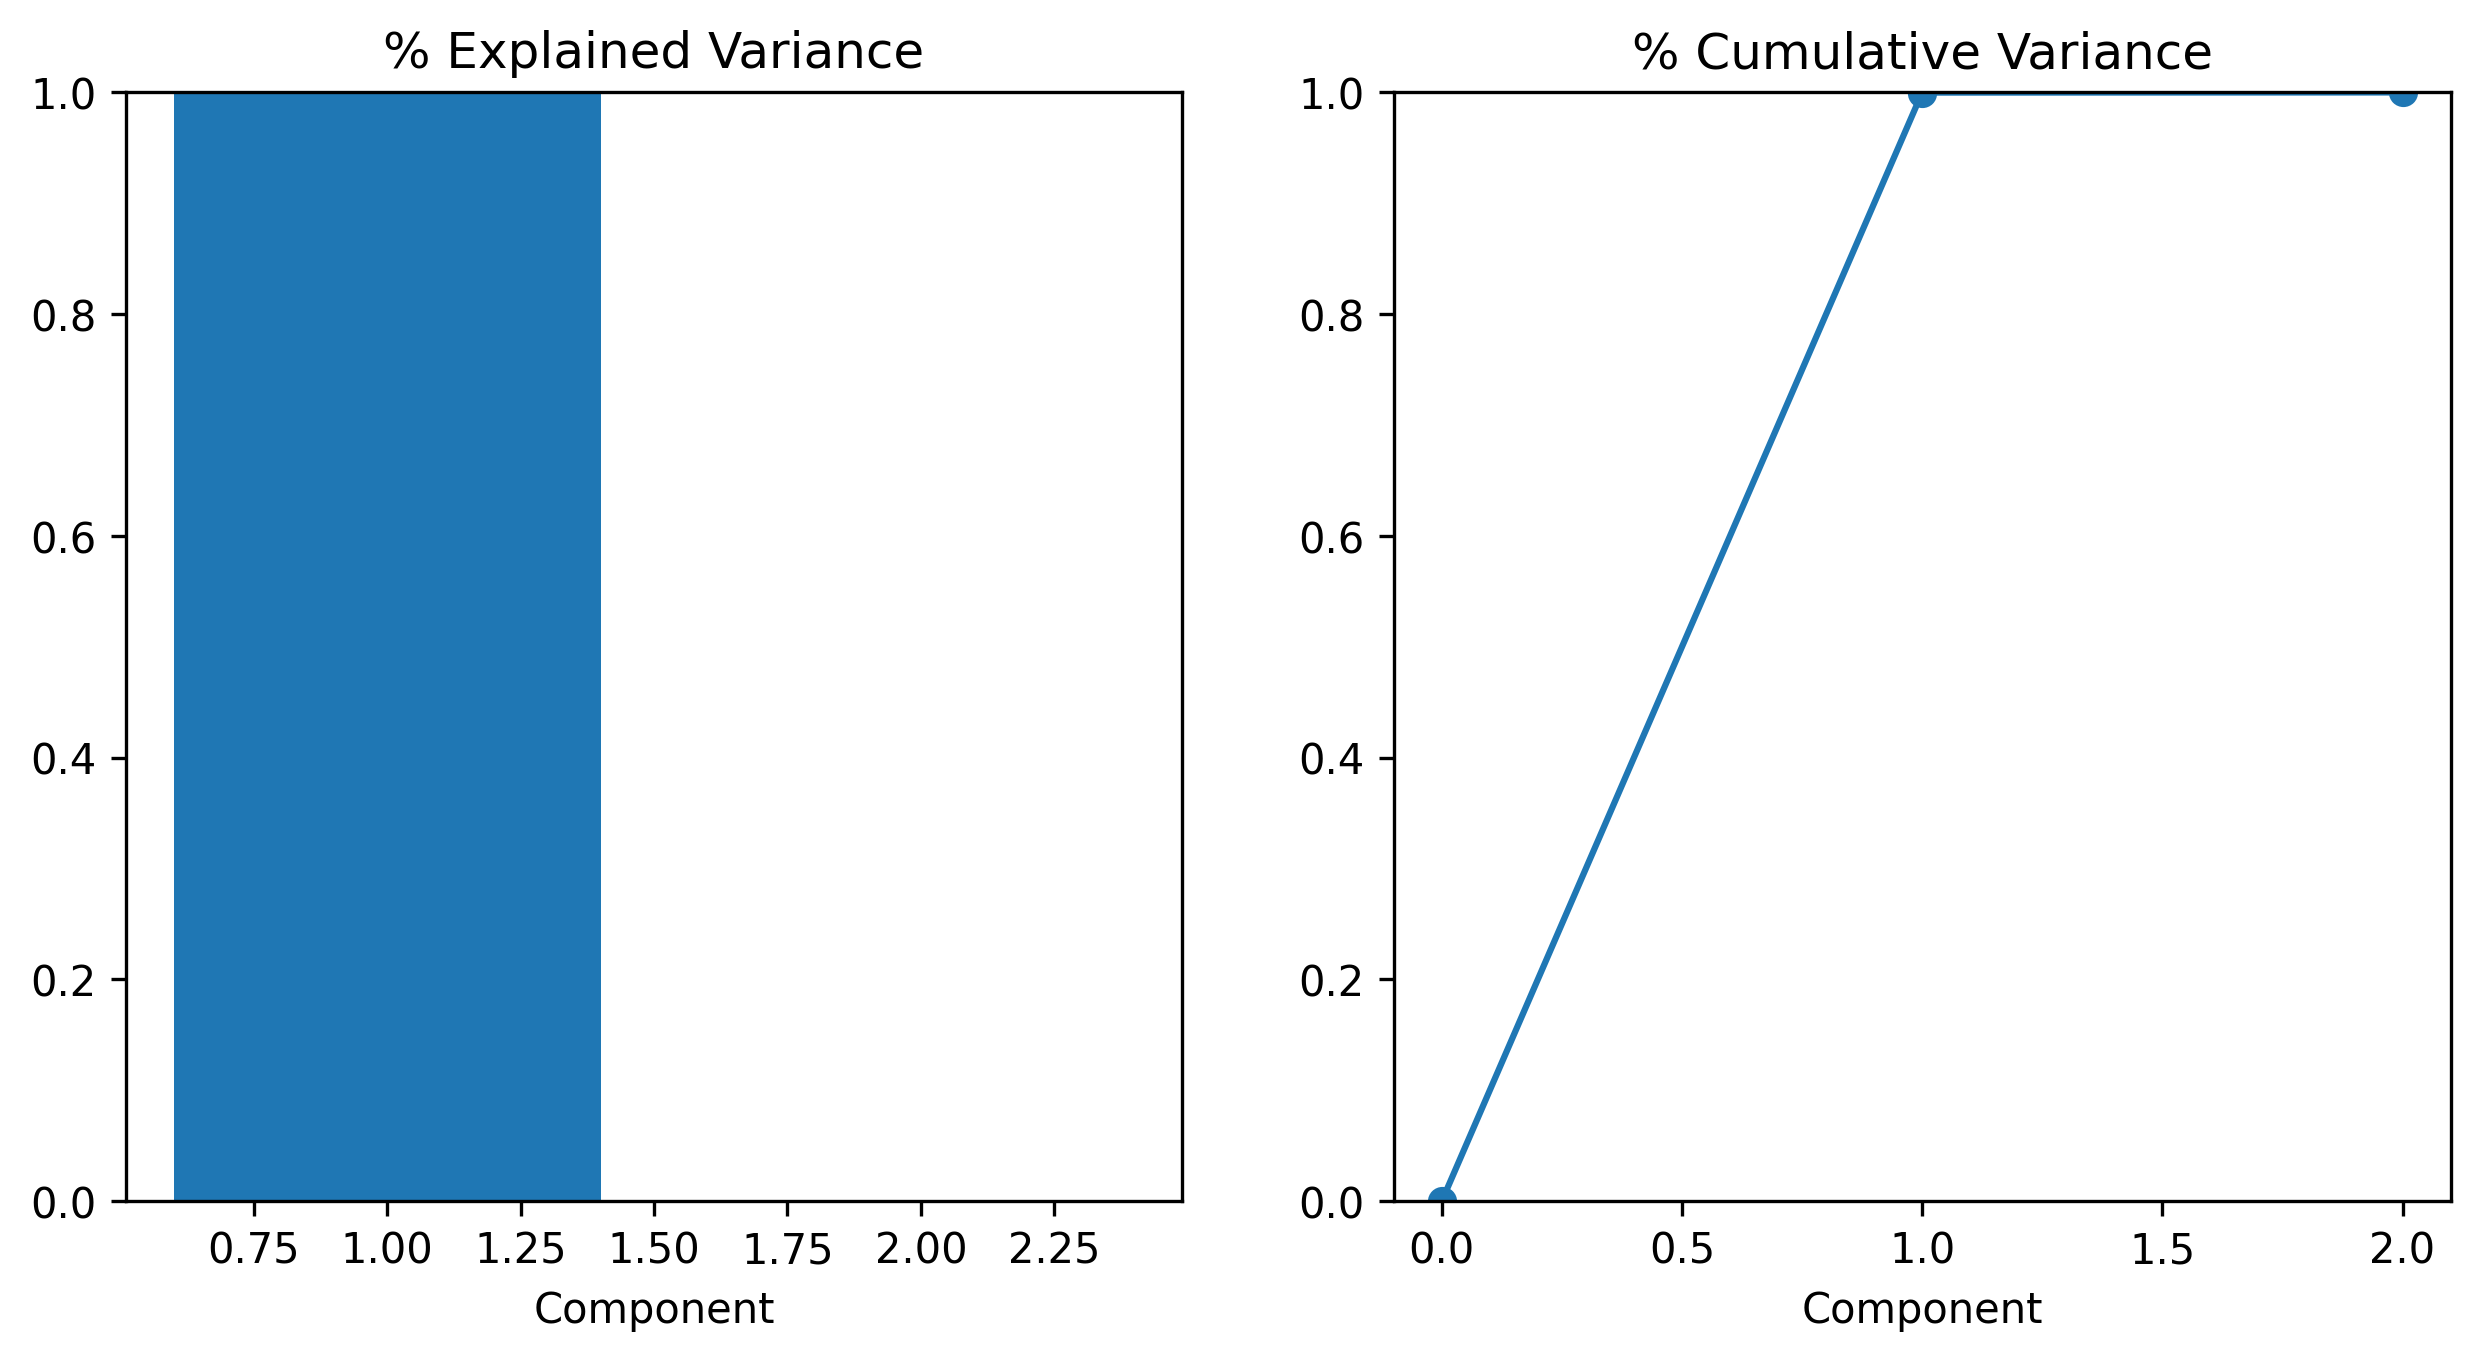

In [ ]:
def plot_variance(pca, width=10, dpi=200):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )

    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )

    fig.set(figwidth=10, dpi=300)
    return axs
plot_variance(pca);

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns


Index(['index', 'entity_id', 'status', 'investment_rounds', 'funding_rounds',
       'funding_total_usd', 'milestones', 'relationships', 'created_at',
       'updated_at', 'ROI', 'companies_age', 'category_code_advertising',
       'category_code_biotech', 'category_code_consulting',
       'category_code_ecommerce', 'category_code_enterprise',
       'category_code_games_video', 'category_code_mobile',
       'category_code_other', 'category_code_software', 'category_code_web',
       'country_code_AUS', 'country_code_CAN', 'country_code_DEU',
       'country_code_ESP', 'country_code_FRA', 'country_code_GBR',
       'country_code_IND', 'country_code_ISR', 'country_code_NLD',
       'country_code_USA', 'country_code_other'],
      dtype='object')

In [ ]:
data = data.drop(columns = ['index','entity_id'])

In [ ]:
data

,status,founded_at,closed_at,investment_rounds,funding_rounds,funding_total_usd,milestones,relationships,created_at,updated_at,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
1,1,2007,2021.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,...,0,0,0,0,0,0,0,0,0,1
2,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,4.43465,2008,2010,...,0,0,0,0,0,1,0,0,0,0
3,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,2.00000,2008,2008,...,0,0,0,0,0,0,0,0,1,0
4,0,2007,2021.0,1.0,1.0,5.000000e+06,3.0,14.00000,2007,2013,...,0,0,0,0,0,0,0,0,1,0
5,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,3.00000,2008,2009,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64089,1,2007,2021.0,1.0,1.0,1.581978e+07,2.0,5.00000,2011,2013,...,0,0,0,0,0,0,0,0,1,0
64090,1,2007,2021.0,1.0,1.0,7.500000e+05,1.0,14.00000,2008,2013,...,0,0,0,0,0,0,0,0,1,0
64091,1,1959,2021.0,1.0,1.0,1.581978e+07,3.0,44.00000,2008,2013,...,0,0,0,0,0,0,0,0,1,0
64092,1,2008,2021.0,1.0,1.0,1.581978e+07,1.0,1.00000,2008,2013,...,0,0,0,0,0,0,0,0,1,0


**Pipeline Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

**Radom Forest**

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('scaler', StandardScaler()),
    ('forest', RandomForestClassifier(n_estimators=100, random_state=0))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [ ]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [ ]:
pipe_dict = {0: 'RandomForest'}
# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

RandomForest Test Accuracy: 0.9198765434564


In [ ]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestClassifier())
])

param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, verbose=1, n_jobs=-1)

grid_search_rf.fit(X_train, y1_train)

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")

y_pred_rf = grid_search_rf.predict(X_test)

print(f"Accuracy score for Random Forest: {accuracy_score(y1_test, y_pred_rf)}")
print(f"Confusion matrix for Random Forest: \n{confusion_matrix(y1_test, y_pred_rf)}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Best score for Random Forest: 0.9374820340457334
Accuracy score for Random Forest: 0.92385797479278284
Confusion matrix for Random Forest:
[[  375   654]
 [   45 11452]]


In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = grid_search_rf.predict(X_test)
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.36      0.51       995
           1       0.94      1.00      0.97     11561

    accuracy                           0.94     12356
   macro avg       0.92      0.66      0.75     12356
weighted avg       0.93      0.93      0.94     12356


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
 pipeline_xgb = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', XGBClassifier())
])

param_grid_xgb = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__n_estimators': [100, 200, 300]
}

grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, verbose=1, n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best score for XGBoost: {grid_search_xgb.best_score_}")

y_pred_xgb = grid_search_xgb.predict(X_test)

print(f"Accuracy score for XGBoost: {accuracy_score(y_test, y_pred_xgb)}")


y_pred_xgb = grid_search_xgb.predict(X_test)
report = classification_report(y_test, y_pred_xgb)
print(report)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for XGBoost: {'model__learning_rate': 0.2, 'model__max_depth': 7, 'model__n_estimators': 100}
Best score for XGBoost: 0.94723483240423342
Accuracy score for XGBoost: 0.9372349327497923
              precision    recall  f1-score   support

           0       0.87      0.38      0.54       995
           1       0.95      1.00      0.98     11561

    accuracy                           0.94     12356
   macro avg       0.93      0.66      0.75     12356
weighted avg       0.94      0.93      0.94     12356
